<a href="https://colab.research.google.com/github/KCY132/HW/blob/main/test0425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

문제1)

1.

최종 w₀ = 35.2656, w₁ = -0.9862


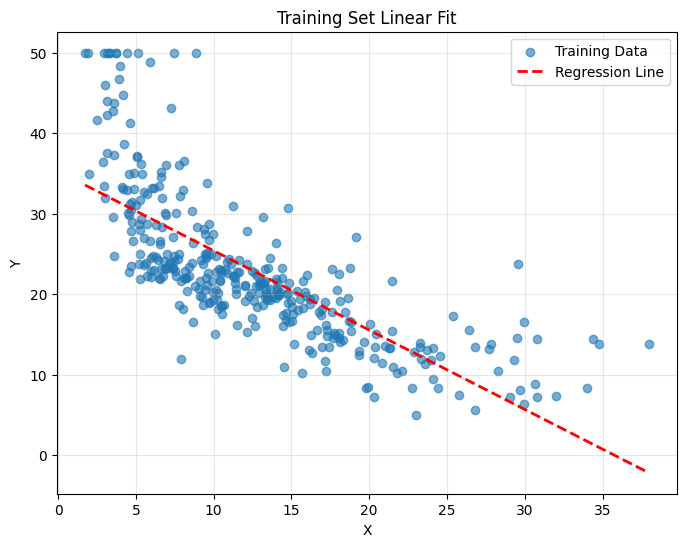

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_excel('boston_house_data.xlsx')
target = pd.read_excel('boston_house_target.xlsx')
X = data[12].values.reshape(-1, 1)
y = target[0].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

mu_X, sigma_X = X_train.mean(), X_train.std()
mu_y, sigma_y = y_train.mean(), y_train.std()
X_train_s = (X_train - mu_X) / sigma_X
y_train_s = (y_train - mu_y) / sigma_y


m_train = X_train_s.shape[0]
Xb_train_s = np.c_[np.ones((m_train, 1)), X_train_s]


w = np.zeros((2,1))          # [w0; w1]
learning_rate = 0.01
n_epochs = 10000

for epoch in range(n_epochs):
    preds_s = Xb_train_s.dot(w)                     # 예측 (m_train,1)
    error_s = preds_s - y_train_s                   # 오차
    grad_s = (1/m_train) * Xb_train_s.T.dot(error_s) # 기울기
    w -= learning_rate * grad_s                     # w 갱신


w1 = (sigma_y / sigma_X) * w[1,0]
w0 = mu_y + sigma_y * w[0,0] - w1 * mu_X

print(f"최종 w₀ = {w0:.4f}, w₁ = {w1:.4f}")


plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, alpha=0.6, label='Training Data')
x_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)
y_line = w0 + w1 * x_line
plt.plot(x_line, y_line, 'r--', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Set Linear Fit')
plt.legend()
plt.grid(alpha=0.3)
plt.show()




2.

2차.

학습된 (스케일) 파라미터 w_s → [-0.0000, -1.8073, 1.1057]
원래 스케일 w → w₀: 43.6009, w₁: -2.3857, w₂: 0.0442


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


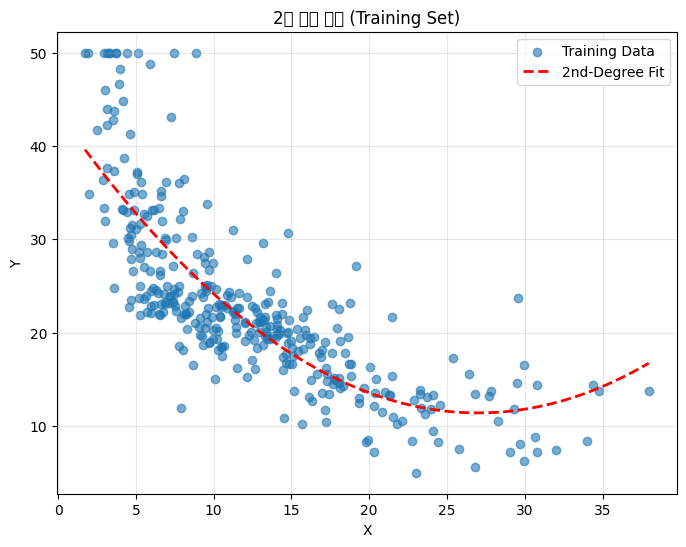

In [80]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


data = pd.read_excel('boston_house_data.xlsx')
target = pd.read_excel('boston_house_target.xlsx')
X = data[12].values.reshape(-1, 1)
y = target[0].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


X_train_poly = np.hstack([X_train, X_train**2])      # (m_train, 2)
X_test_poly  = np.hstack([X_test,  X_test**2])       # (m_test, 2)

mu_X = X_train_poly.mean(axis=0)                     # [mu_1, mu_2]
sigma_X = X_train_poly.std(axis=0)                   # [sigma_1, sigma_2]
mu_y = y_train.mean()
sigma_y = y_train.std()


X_train_s = (X_train_poly - mu_X) / sigma_X
y_train_s = (y_train - mu_y) / sigma_y


m_train = X_train_s.shape[0]
Xb_train_s = np.c_[np.ones((m_train,1)), X_train_s]   # (m_train, 3)


w = np.zeros((3,1))  # [w0; w1; w2]
learning_rate = 0.01
n_epochs = 10000

for epoch in range(n_epochs):
    preds_s = Xb_train_s.dot(w)                           # (m_train,1)
    error_s = preds_s - y_train_s                         # (m_train,1)
    grad_s = (1/m_train) * Xb_train_s.T.dot(error_s)      # (3,1)
    w -= learning_rate * grad_s                           # w 갱신

w0 = sigma_y*w[0,0] - sigma_y*(w[1,0]*mu_X[0]/sigma_X[0]) - sigma_y*(w[2,0]*mu_X[1]/sigma_X[1]) + mu_y
w1 = sigma_y * w[1,0] / sigma_X[0]
w2 = sigma_y * w[2,0] / sigma_X[1]

print(f"학습된 (스케일) 파라미터 w_s → [{w[0,0]:.4f}, {w[1,0]:.4f}, {w[2,0]:.4f}]")
print(f"원래 스케일 w → w₀: {w0:.4f}, w₁: {w1:.4f}, w₂: {w2:.4f}")


plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, alpha=0.6, label='Training Data')


x_line = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1,1)
y_line = w0 + w1 * x_line + w2 * (x_line**2)
plt.plot(x_line, y_line, 'r--', linewidth=2, label='2nd-Degree Fit')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2차 다항 회귀 (Training Set)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


3.모델의 정확도

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_excel('boston_house_data.xlsx')
target = pd.read_excel('boston_house_target.xlsx')

X = data[12].values.reshape(-1, 1)
y = target[0].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


mu_X_lin, sigma_X_lin = X_train.mean(), X_train.std()
mu_y_lin, sigma_y_lin = y_train.mean(), y_train.std()


X_train_lin_s = (X_train - mu_X_lin) / sigma_X_lin
y_train_s = (y_train - mu_y_lin) / sigma_y_lin
m_train = X_train_lin_s.shape[0]
Xb_train_lin_s = np.c_[np.ones((m_train,1)), X_train_lin_s]
w_lin = np.zeros((2,1))
lr = 0.01
epochs = 10000

for _ in range(epochs):
    preds = Xb_train_lin_s.dot(w_lin)
    grad = (1/m_train) * Xb_train_lin_s.T.dot(preds - y_train_s)
    w_lin -= lr * grad


w1_lin = (sigma_y_lin/sigma_X_lin) * w_lin[1,0]
w0_lin = mu_y_lin + sigma_y_lin * w_lin[0,0] - w1_lin * mu_X_lin


X_train_poly = np.hstack([X_train, X_train**2])
mu_Xp, sigma_Xp = X_train_poly.mean(axis=0), X_train_poly.std(axis=0)
X_train_poly_s = (X_train_poly - mu_Xp) / sigma_Xp
Xb_train_poly_s = np.c_[np.ones((m_train,1)), X_train_poly_s]
w_poly = np.zeros((3,1))

for _ in range(epochs):
    preds_p = Xb_train_poly_s.dot(w_poly)
    grad_p = (1/m_train) * Xb_train_poly_s.T.dot(preds_p - y_train_s)
    w_poly -= lr * grad_p


w1_p = sigma_y_lin * w_poly[1,0] / sigma_Xp[0]
w2_p = sigma_y_lin * w_poly[2,0] / sigma_Xp[1]
w0_p = sigma_y_lin*w_poly[0,0] - w1_p*mu_Xp[0] - w2_p*mu_Xp[1] + mu_y_lin


def evaluate(w0, coeffs, X_test, y_test):
    # coeffs: 리스트 [w1, w2, ...] (1차모델은 [w1]; 2차모델은 [w1, w2])
    y_pred = w0 + sum(c * X_test**i for i, c in enumerate(coeffs, start=1))
    mse = np.mean((y_test - y_pred)**2)
    r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)
    return mse, r2

mse_lin, r2_lin = evaluate(w0_lin, [w1_lin], X_test, y_test)
mse_poly, r2_poly = evaluate(w0_p, [w1_p, w2_p], X_test, y_test)

print(f"【선형 모델】 MSE: {mse_lin:.4f}, R²: {r2_lin:.4f}")
print(f"【2차 모델】 MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")





【선형 모델】 MSE: 38.0987, R²: 0.4887
【2차 모델】 MSE: 31.5190, R²: 0.5770


문제2

2-1

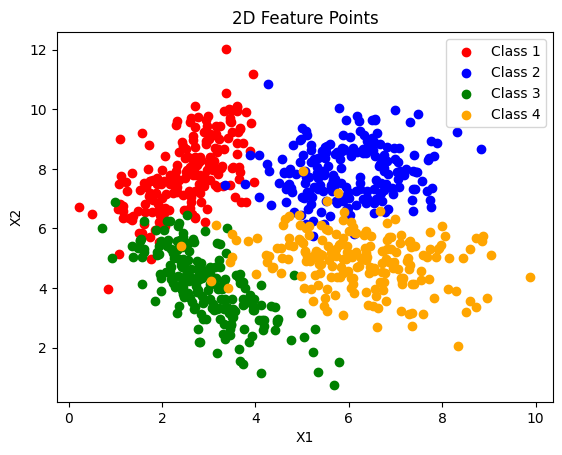

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('multivariate_data.csv')

plt.scatter(df['C1_X1'], df['C1_X2'], label='Class 1', color='red')
plt.scatter(df['C2_X1'], df['C2_X2'], label='Class 2', color='blue')
plt.scatter(df['C3_X1'], df['C3_X2'], label='Class 3', color='green')
plt.scatter(df['C4_X1'], df['C4_X2'], label='Class 4', color='orange')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Feature Points')
plt.legend()
plt.show()

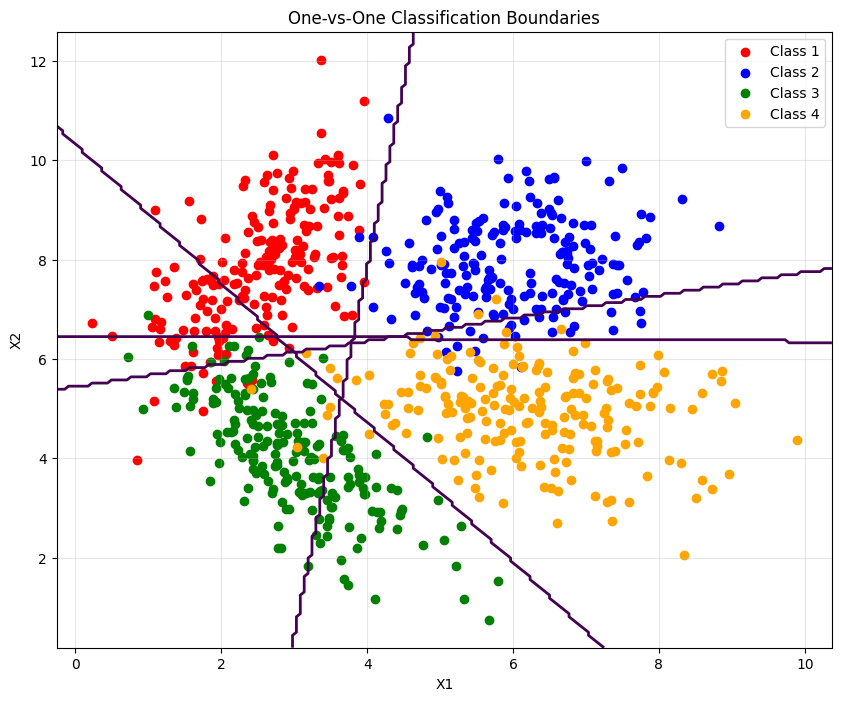

In [83]:

def plot_decision_boundary(model, ax):
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[0.5], linewidths=2, linestyles='-')

pairs = [
    (X1, X2),
    (X1, X3),
    (X3, X4),
    (X2, X4)
]

plt.figure(figsize=(10, 8))
plt.scatter(X1[:,0], X1[:,1], color='red', label='Class 1')
plt.scatter(X2[:,0], X2[:,1], color='blue', label='Class 2')
plt.scatter(X3[:,0], X3[:,1], color='green', label='Class 3')
plt.scatter(X4[:,0], X4[:,1], color='orange', label='Class 4')

ax = plt.gca()
for X_a, X_b in pairs:
    X_pair = np.vstack([X_a, X_b])
    y_pair = np.hstack([np.zeros(len(X_a)), np.ones(len(X_b))])
    clf = LogisticRegression().fit(X_pair, y_pair)
    plot_decision_boundary(clf, ax)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('One-vs-One Classification Boundaries')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

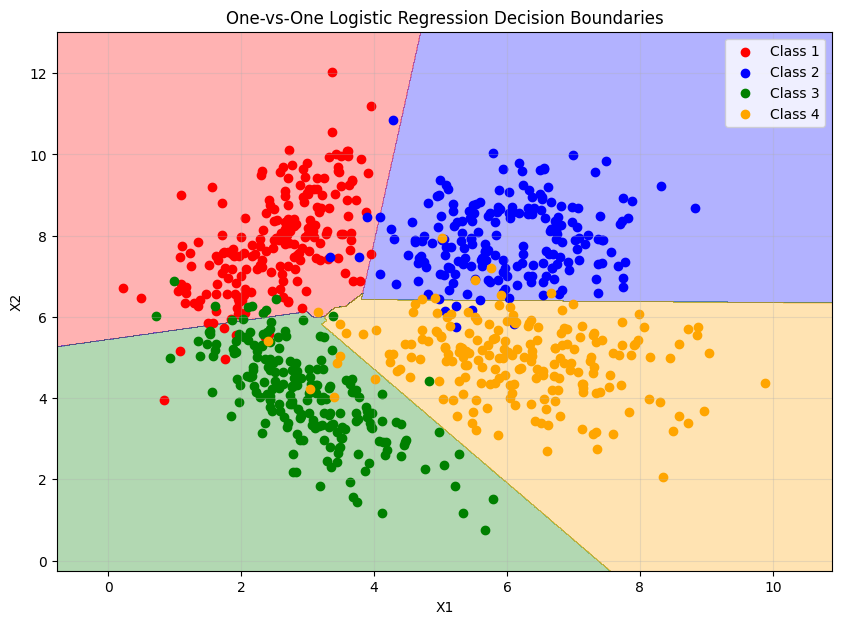

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from matplotlib.colors import ListedColormap


X = np.vstack([
    df[['C1_X1', 'C1_X2']].values,
    df[['C2_X1', 'C2_X2']].values,
    df[['C3_X1', 'C3_X2']].values,
    df[['C4_X1', 'C4_X2']].values
])
y = np.array([0]*len(df) + [1]*len(df) + [2]*len(df) + [3]*len(df))


ovo_classifier = OneVsOneClassifier(LogisticRegression())
ovo_classifier.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


Z = ovo_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue', 'green', 'orange']))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 1')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 2')
plt.scatter(X[y==2, 0], X[y==2, 1], color='green', label='Class 3')
plt.scatter(X[y==3, 0], X[y==3, 1], color='orange', label='Class 4')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('One-vs-One Logistic Regression Decision Boundaries')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


2-2

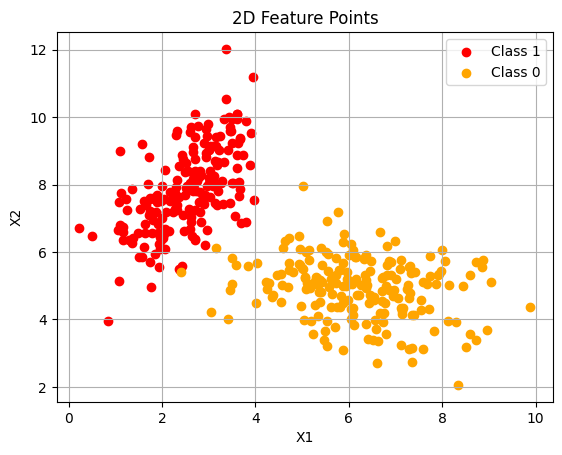

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('multivariate_data.csv')

plt.scatter(df['C1_X1'], df['C1_X2'], label='Class 1', color='red')
plt.scatter(df['C4_X1'], df['C4_X2'], label='Class 0', color='orange')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Feature Points')
plt.legend()
plt.grid(True)
plt.show()

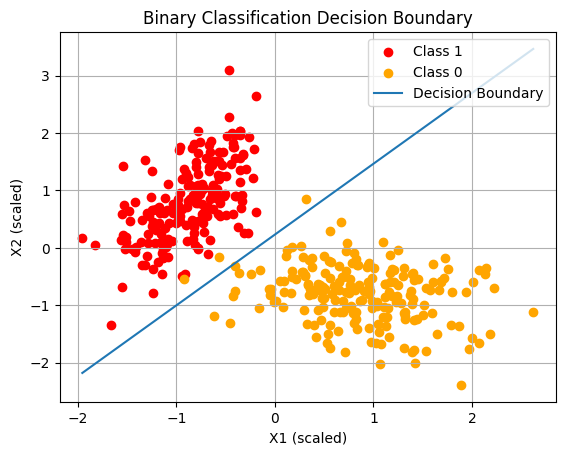

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('multivariate_data.csv')
X1 = df[['C1_X1','C1_X2']].values   # Class 1
y1 = np.ones(len(X1))
X0 = df[['C4_X1','C4_X2']].values   # Class 0
y0 = np.zeros(len(X0))

X = np.vstack([X1, X0])
y = np.hstack([y1, y0])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Xb = np.c_[np.ones(X_scaled.shape[0]), X_scaled]


theta = np.zeros(Xb.shape[1])
lr = 0.01
epochs = 10000

for _ in range(epochs):
    z = Xb.dot(theta)
    h = 1 / (1 + np.exp(-z))
    theta -= lr * (Xb.T.dot(h - y)) / len(y)


x_vals = np.array([X_scaled[:,0].min(), X_scaled[:,0].max()])
y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]


plt.scatter(X_scaled[y==1, 0], X_scaled[y==1, 1], marker='o',color='red', label='Class 1')
plt.scatter(X_scaled[y==0, 0], X_scaled[y==0, 1], marker='o',color='orange', label='Class 0')
plt.plot(x_vals, y_vals, label='Decision Boundary')
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.title('Binary Classification Decision Boundary')
plt.show()


